In [1]:
from style import StyleTransfer
from utils import list_images, image_postprocess, preload_img
from matplotlib.pyplot import imshow
from debug import dump_model
import numpy as np

%matplotlib inline 



/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
style = StyleTransfer(stop_layer='block4_conv1')


In [3]:
style.load_weights("decoder.t7")

In [4]:

#training = style.training(lamda=.1)
#training.start("content", "style", epochs=2, limit=2048, input_size=1024, shape=(32,32,3))

In [8]:
contents = np.asarray(list(list_images("content", limit=20, shape=(512,512,3))))
styles = np.asarray(list(list_images("style", limit=20, shape=(512,512,3))))

/usr/local/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [21]:
result = style.predict(contents, styles)

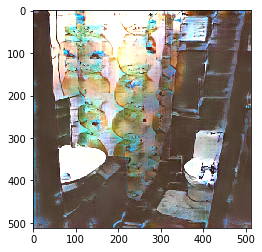

In [36]:
imshow(image_postprocess(result[18]))

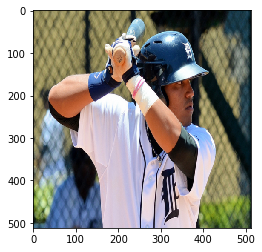

In [11]:
imshow(image_postprocess(contents[0]))

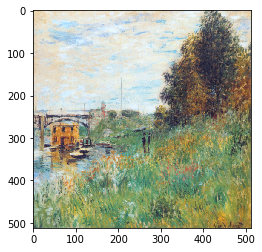

In [12]:
imshow(image_postprocess(styles[0]))

In [13]:
style_img = np.expand_dims(preload_img("seurat-2.jpeg"), axis=0)

In [14]:
content_img = np.expand_dims(preload_img("paccots.jpg"), axis=0)

In [15]:
result = style.predict(content_img, content_img)

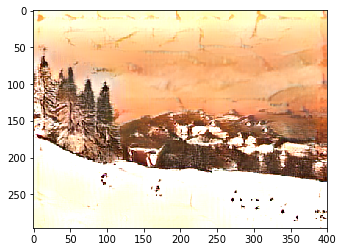

In [16]:
imshow(image_postprocess(result[0]))

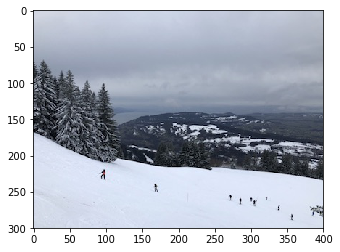

In [17]:
imshow(image_postprocess(content_img[0]))